<a href="https://colab.research.google.com/github/TrzeciakPiotr2300/Uczenie_Maszynowe_2025/blob/main/lab1_HW_Trzeciak_Piotr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Zadanie domowe 1 (PCA)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("PCA_three_clusters_data.csv")
df.head(n=3)

,x,y,z,class
0,0.647689,-0.138264,3.512299,0
1,-0.234137,-0.234153,10.769447,0
2,-0.469474,0.767435,11.166721,0


In [6]:
features = ["x","y","z"]

# Separating features and target values
x = df.loc[:, features].values
y = df.loc[:, ['class']].values

x = StandardScaler().fit_transform(x)

In [7]:
pca = PCA(n_components = 2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
                           , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df['class']], axis=1)
finalDf.head(3)

,principal component 1,principal component 2,class
0,-1.125822,0.059869,0
1,-1.893687,0.958083,0
2,-1.618862,1.399074,0


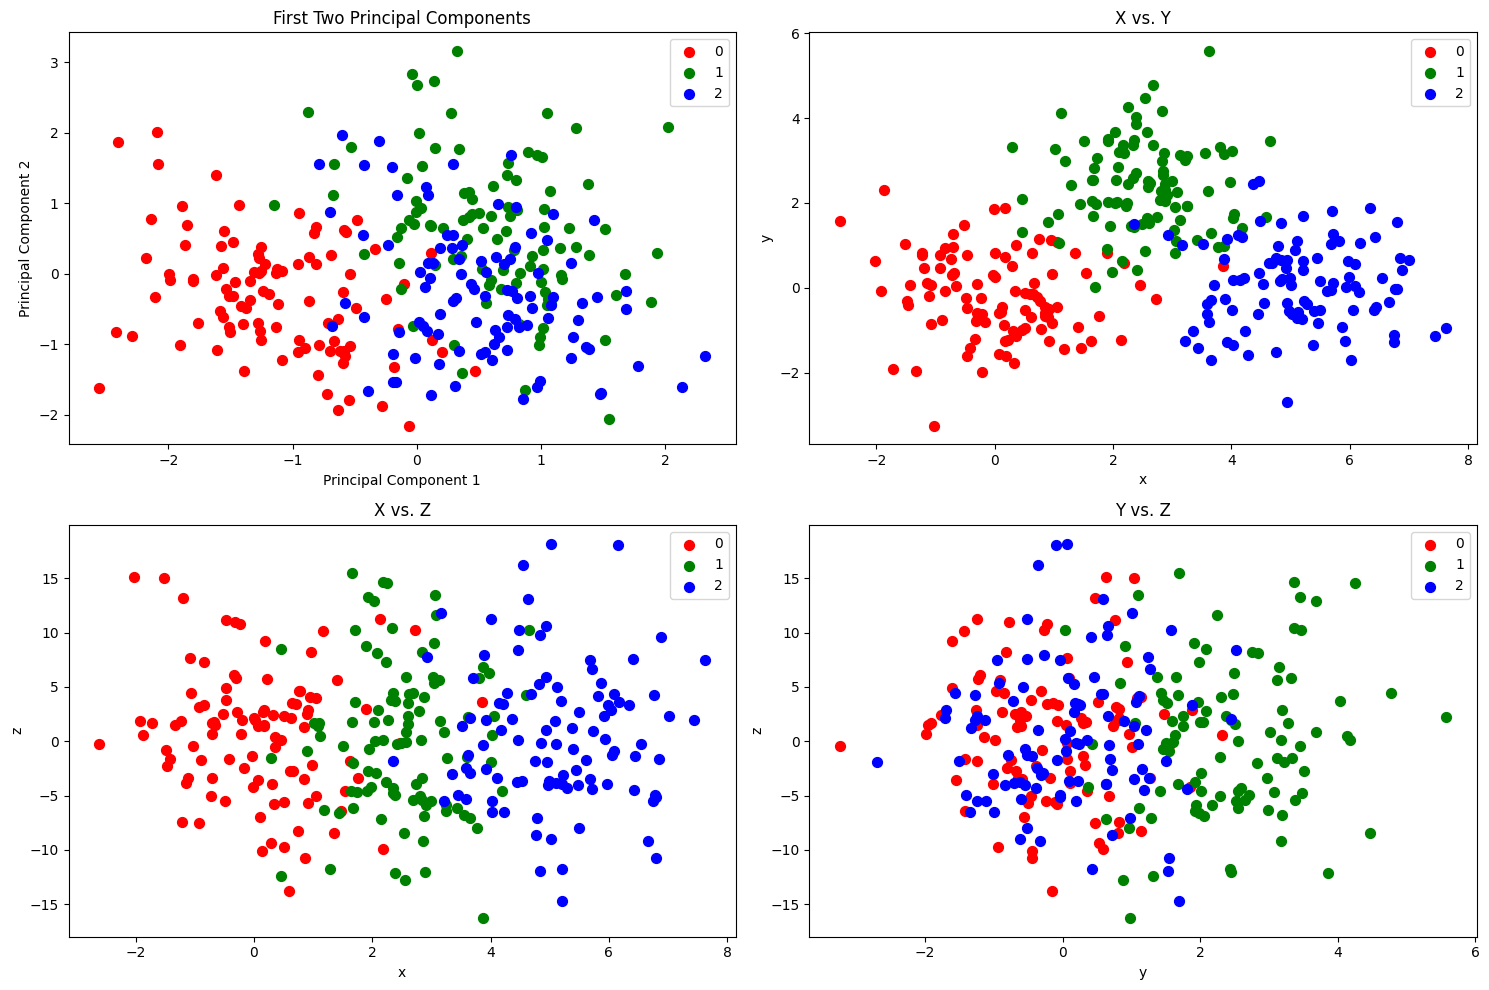

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

targets = [0, 1, 2]
colors = ['r', 'g', 'b']

# Plot for PCA
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['class'] == target
    ax[0,0].scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
                    finalDf.loc[indicesToKeep, 'principal component 2'],
                    c=color, label=target, s=50)

# Plot for X, Y, Z vs. each other
for target, color in zip(targets, colors):
    indicesToKeep = df['class'] == target
    ax[0,1].scatter(df.loc[indicesToKeep, 'x'],
                    df.loc[indicesToKeep, 'y'],
                    c=color, label=target, s=50)

    ax[1,0].scatter(df.loc[indicesToKeep, 'x'],
                    df.loc[indicesToKeep, 'z'],
                    c=color, label=target, s=50)

    ax[1,1].scatter(df.loc[indicesToKeep, 'y'],
                    df.loc[indicesToKeep, 'z'],
                    c=color, label=target, s=50)

# Aestics
ax[0,0].legend()
ax[0,0].set_xlabel("Principal Component 1")
ax[0,0].set_ylabel("Principal Component 2")
ax[0,0].set_title("First Two Principal Components")

ax[0,1].legend()
ax[0,1].set_xlabel("x")
ax[0,1].set_ylabel("y")
ax[0,1].set_title("X vs. Y")

ax[1,0].legend()
ax[1,0].set_xlabel("x")
ax[1,0].set_ylabel("z")
ax[1,0].set_title("X vs. Z")

ax[1,1].legend()
ax[1,1].set_xlabel("y")
ax[1,1].set_ylabel("z")
ax[1,1].set_title("Y vs. Z")

plt.tight_layout()
plt.show()

In [9]:
# Wygląda na to, że pca nie poprawiło separacji zmiennych - najlepiej odróżnia się punkty po współrzędnych (x,y), zaraz potem (x,z).

In [10]:
np.cumsum(pca.explained_variance_ratio_)

array([0.34722276, 0.68164111])

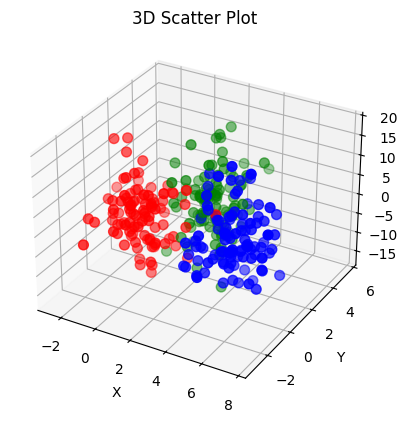

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')

colors = df['class'].map({0: 'r', 1: 'g', 2: 'b'})
ax.scatter3D(df['x'], df['y'], df['z'], c=colors, s=50)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("3D Scatter Plot")

plt.show()


In [12]:
#Dlaczego standaryzowanie jest ważne przy algorytmach ML (w tym PCA)? Ponieważ PCA jest zaburzane poprzez skalę w danych (np. różnice w wielkościach dla
#każdej zmiennej objaśniającej). Gdy kolumna A ma wartości float64 w przedziale (-0.1, 0.1), a kolumna B float64 w przedziale (-100.0, 100.0), to A może
#zniknąć poprzez wpływ kolumny B. Może jednak się okazać, że obie są ważne w predykcji zmiennej objaśnianej.